# Pyber Data Analysis



In [25]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Trends

###### 1) There is a higher number of drivers as well as rides in Urban places than in any other type of cities, i.e, suburban and rural. In fact, based on the data (collected in 2018), 86.7% of the total drivers are in Urban places, 12.5% of total drivers are in Suburban places, and less than 1% of drivers are in Rural places. We could deduce that, although more information might be needed, not only urban places tend to have more population but also that people in urban places are more used to taking cabs than people in rural places.     

###### 2) We can also conclude that there is a negative correlation between the number of drivers / rides per city type and the average fare by city type; in other words, Urban places, which tend to have more drivers, and rides, per city, have a smaller average fare per city than Suburban and Rural places. This might be due a higher supply of drivers (which tends to drive the fare down due to more competition) or also that the rides in Rural places tend to be for longer distances. 

##### 3) There might be an opportunity for the company to expand its presence in the suburban places since people in these cities are used to taking cabs (average number of rides per city type in suburban places is between 15 to 20 rides while the average in urban places is between 20 to 30 rides) plus they pay more on average per ride than people in urban places. In addition, distances in suburban areas tend to be relatively short, unlike rural places. More data and analysis would have to be conducted to determine whether this could be an opportunity pr not.  

In [26]:
# Read csv files
city_data = pd.read_csv("Pyber/raw_data/city_data.csv")
ride_data = pd.read_csv("Pyber/raw_data/ride_data.csv")

In [27]:
# create dataframe
table_1 = pd.merge(ride_data, city_data, how = "outer", on = "city")
table_1.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83%,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25%,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89%,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28%,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89%,424254840012,5,Urban


## Find:
##### Average Fare  in dollars Per City
##### Total Number of Rides Per City
##### Total Number of Drivers Per City
##### City Type (Urban, Suburban, Rural)

In [28]:
# Sort the table by city in an ascending way
# Reset index to start from 0

table_1_sorted = table_1.sort_values("city", ascending = True)
new_table_1 = table_1_sorted.reset_index(drop=True)
new_table_1.head(4)

,city,date,fare,ride_id,driver_count,type
0,Amandaburgh,2018-01-11 02:22:07,29.24%,7279902884763,12,Urban
1,Amandaburgh,2018-03-05 02:15:38,26.28%,906850928986,12,Urban
2,Amandaburgh,2018-02-24 23:10:49,43.66%,6573820412437,12,Urban
3,Amandaburgh,2018-02-10 20:42:46,36.17%,6455620849753,12,Urban


In [29]:
group_by = new_table_1.groupby(["city"])

# Get average fare by city
average_by_fare = group_by["fare"].mean()

# Total Number of Rides Per City
# rides_per_city = new_table_1["city"].value_counts()

rides_per_city = group_by["ride_id"].count()

# Total Number of Drivers Per City
drivers_per_city = group_by["driver_count"].mean()

# Get City Type
city_type = list(group_by.apply(lambda x: x["type"].unique()))

# Create new DataFrame and insert all new variables
table_2 = pd.DataFrame({"Average Fare":average_by_fare,"Rides per City":rides_per_city,
                        "Drivers per City":drivers_per_city, "City Type": city_type}
                       ,columns=["Average Fare","Rides per City", "Drivers per City", "City Type"])

# Formatting 
pd.set_option("display.float_format", "${:,.2f}".format)
table_2["City Type"] = table_2["City Type"].str.get(0)

# Reset index "City"
table_2.index.name = "City"
table_2.reset_index(inplace=True)

table_2.head()

,City,Average Fare,Rides per City,Drivers per City,City Type
0,Amandaburgh,$24.64,18,12,Urban
1,Barajasview,$25.33,22,26,Urban
2,Barronchester,$36.42,16,11,Suburban
3,Bethanyland,$32.96,18,22,Suburban
4,Bradshawfurt,$40.06,10,7,Rural


## Build a Bubble Plot that showcases the relationship between four key variables:

##### Average Fare Per City
##### Total Number of Rides Per City
##### Total Number of Drivers Per City
##### City Type (Urban, Suburban, Rural)

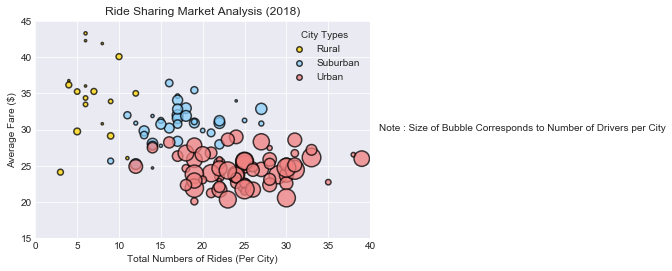

In [17]:
# Define the variables: Rides per city and average fare per city for each city type
rides_per_city_rural = table_2.loc[table_2["City Type"] == "Rural","Rides per City"]
average_by_fare_rural = table_2.loc[table_2["City Type"] == "Rural","Average Fare"]

rides_per_city_suburban = table_2.loc[table_2["City Type"] == "Suburban","Rides per City"]
average_by_fare_suburban = table_2.loc[table_2["City Type"] == "Suburban","Average Fare"]

rides_per_city_urban = table_2.loc[table_2["City Type"] == "Urban","Rides per City"]
average_by_fare_urban = table_2.loc[table_2["City Type"] == "Urban","Average Fare"]


rural = table_2.loc[table_2["City Type"] == "Rural","Drivers per City"]
suburban = table_2.loc[table_2["City Type"] == "Suburban","Drivers per City"]
urban = table_2.loc[table_2["City Type"] == "Urban","Drivers per City"]


# Plot the scatter chart
plt.scatter(rides_per_city_rural, average_by_fare_rural, s= rural*5, marker = "o", facecolors = "gold", 
            edgecolors = "black", alpha = 0.75, label = "Rural", linewidth = 1.5)

plt.scatter(rides_per_city_suburban , average_by_fare_suburban, s= suburban*5, marker = "o", facecolors = "lightskyblue", 
            edgecolors = "black", alpha = 0.75, label = "Suburban", linewidth = 1.5)

plt.scatter(rides_per_city_urban, average_by_fare_urban, s= urban*5, marker = "o", facecolors = "lightcoral", 
            edgecolors = "black", alpha = 0.75, label = "Urban",  linewidth = 1.5)

# Define limits, labels, title, and note(figtext)
x_limit = 40
y_limit = 45
plt.xlim(0,x_limit)
plt.ylim(15,y_limit)

plt.title("Ride Sharing Market Analysis (2018)")


plt.xlabel("Total Numbers of Rides (Per City)")
plt.ylabel("Average Fare ($)")
lgnd = plt.legend(loc=1, borderpad=.5, frameon=False, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.figtext(.92, .5, "Note : Size of Bubble Corresponds to Number of Drivers per City", rotation='horizontal', clip_on=True)

# Format chart using seaborn => Gray grid
sns.set_style(style='darkgrid')

# Plot the chart
plt.show()
 

## Now Get:
##### % of Total Fares by City Type
##### % of Total Rides by City Type
##### % of Total Drivers by City Type


In [18]:
# Create a variable for group by "Type"
group = table_1.groupby(["type"])

# Create variables for different headers in the new dataframe
total_fare = table_1["fare"].sum()
fare_by_type = group["fare"].sum()

total_rides = table_1["ride_id"].count()
rides_by_type = group["ride_id"].count()

total_drivers = table_1["driver_count"].sum()
drivers_by_type = group["driver_count"].sum()

# Define formulas
percentage_fare_by_type = list(fare_by_type / total_fare * 100)
percentage_rides_by_type = rides_by_type / total_rides * 100
percentage_drivers_by_type = drivers_by_type / total_drivers * 100

# Format data in the dataframe 
pd.set_option("display.float_format","{:,.2f}%".format)

# Create dataframe and assign variables 
percentages_by_type_df = pd.DataFrame({"% of Total Fares by City Type":percentage_fare_by_type, "% of Total Rides by City Type":percentage_rides_by_type
                                      , "% of Total Drivers by City Type":percentage_drivers_by_type}
                                      ,columns=["% of Total Fares by City Type","% of Total Rides by City Type","% of Total Drivers by City Type"])

# Display new dataframe
percentages_by_type_df

,% of Total Fares by City Type,% of Total Rides by City Type,% of Total Drivers by City Type
type,,,
Rural,6.81%,5.26%,0.78%
Suburban,30.46%,26.32%,12.47%
Urban,62.72%,68.42%,86.75%


## Build Pie Charts that represent the 3 different category percentages: 

##### % of Total Fares by City Type
##### % of Total Rides by City Type
##### % of Total Drivers by City Type

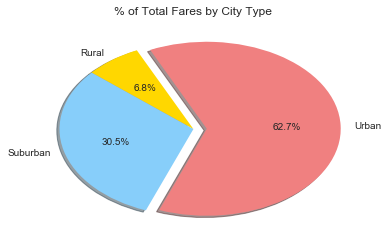

In [19]:
# Create Pie charts for "Total Fares by City Type"
labels = ["Rural","Suburban", "Urban"]
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

plt.pie(percentage_fare_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=115)

plt.title("% of Total Fares by City Type")

# Plot Pie chart
plt.show()

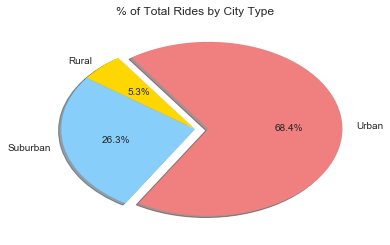

In [20]:
# Create Pie charts for "Total Rides by City Type"
plt.pie(percentage_rides_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=125)

plt.title("% of Total Rides by City Type")

# Plot Pie chart
plt.show()

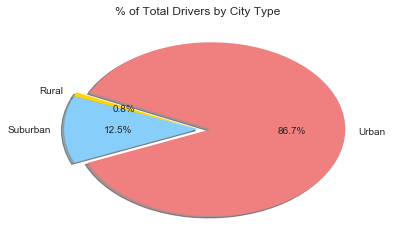

In [21]:
# Create Pie charts for "Total Drivers by City Type"
plt.pie(percentage_drivers_by_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=155)

plt.title("% of Total Drivers by City Type")

# Plot Pie chart
plt.show()